# Question : 

Build a logistic regression model to predict whether a student gets admitted into a
university. Suppose that you are the administrator of a university department and
you want to determine each applicant’s chance of admission based on their results
on two exams. You have historical data from previous applicants that you can use
as a training set for logistic regression. For each training example, you have the
applicant’s scores on two exams and the admissions decision. Your task is to build
a classification model that estimates an applicant’s probability of admission based
on the scores from those two exams. (Dataset attached as a CSV file)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
df = pd.read_excel('applicant_score dataset (1).xlsx')
df

,Applicant ID,GRE Score(800),TOEFL Score(120),Admitted (Yes/No)
0,1,700,100,Yes
1,2,650,95,Yes
2,3,580,88,No
3,4,720,105,Yes
4,5,600,140,No
5,6,750,110,Yes
6,7,850,85,No
7,8,680,100,Yes
8,9,520,80,No
9,10,710,108,Yes


In [2]:
# Define maximum GRE and TOEFL scores
max_GRE = 800
max_TOEFL = 120

# Clip the GRE and TOEFL scores to their respective maximum values
df['GRE Score(800)'] = df['GRE Score(800)'].clip(upper=max_GRE)
df['TOEFL Score(120)'] = df['TOEFL Score(120)'].clip(upper=max_TOEFL)

# Display the modified DataFrame
print(df)

    Applicant ID  GRE Score(800)  TOEFL Score(120) Admitted (Yes/No)
0              1             700               100               Yes
1              2             650                95               Yes
2              3             580                88                No
3              4             720               105               Yes
4              5             600               120                No
5              6             750               110               Yes
6              7             800                85                No
7              8             680               100               Yes
8              9             520                80                No
9             10             710               108               Yes
10            11             620                92                No
11            12             730               112               Yes
12            13             500                78                No
13            14             630  

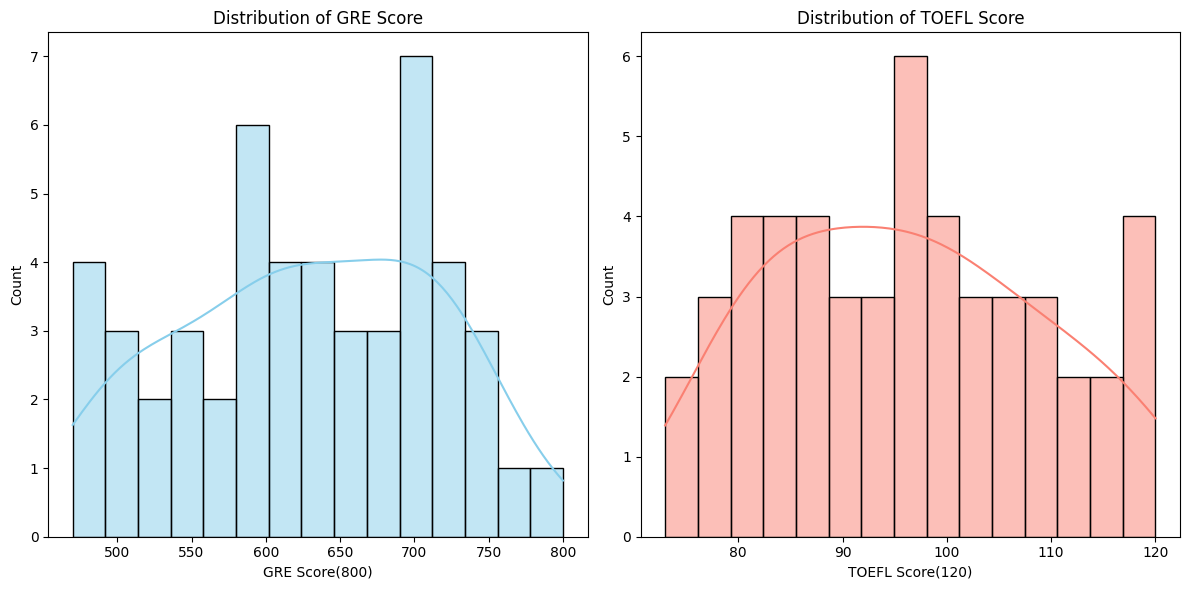

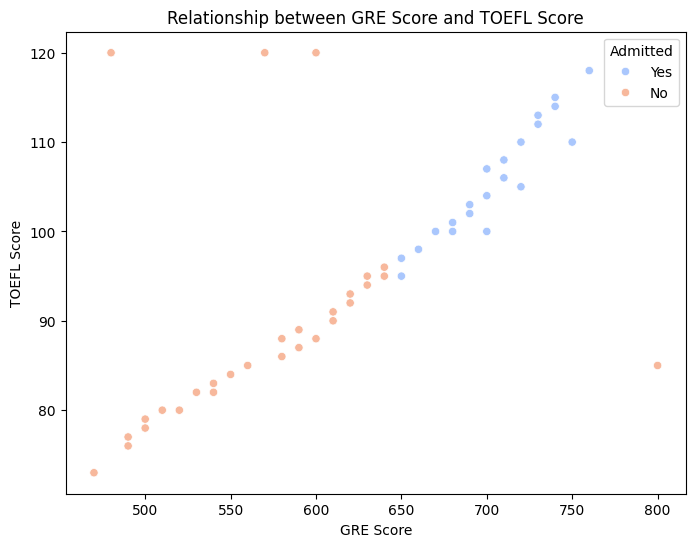

C:\Users\alikh\AppData\Local\Temp\ipykernel_23300\3631139803.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Admitted (Yes/No)', data=df, palette='Set2')


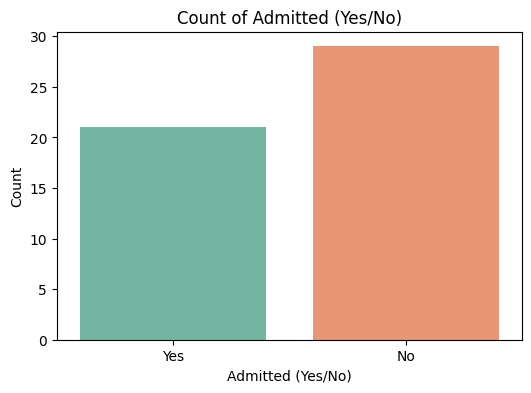

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

# Distribution of 'GRE Score(800)' and 'TOEFL Score(120)'
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(df['GRE Score(800)'], bins=15, kde=True, color='skyblue')
plt.title('Distribution of GRE Score')

plt.subplot(1, 2, 2)
sns.histplot(df['TOEFL Score(120)'], bins=15, kde=True, color='salmon')
plt.title('Distribution of TOEFL Score')

plt.tight_layout()
plt.show()

# Relationship between 'GRE Score(800)' and 'TOEFL Score(120)'
plt.figure(figsize=(8, 6))
sns.scatterplot(x='GRE Score(800)', y='TOEFL Score(120)',
                hue='Admitted (Yes/No)', data=df, palette='coolwarm')
plt.title('Relationship between GRE Score and TOEFL Score')
plt.xlabel('GRE Score')
plt.ylabel('TOEFL Score')
plt.legend(title='Admitted')
plt.show()

# Countplot of 'Admitted (Yes/No)'
plt.figure(figsize=(6, 4))
sns.countplot(x='Admitted (Yes/No)', data=df, palette='Set2')
plt.title('Count of Admitted (Yes/No)')
plt.xlabel('Admitted (Yes/No)')
plt.ylabel('Count')
plt.show()

In [4]:
from sklearn.model_selection import train_test_split

# Convert 'Admitted (Yes/No)' column into binary labels (0 for No, 1 for Yes)
df['Admitted (Yes/No)'] = df['Admitted (Yes/No)'].map({'No': 0, 'Yes': 1})

# Feature selection
X = df[['GRE Score(800)', 'TOEFL Score(120)']]
y = df['Admitted (Yes/No)']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# Display the shape of the training and testing sets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (40, 2)
Shape of X_test: (10, 2)
Shape of y_train: (40,)
Shape of y_test: (10,)


In [5]:
def evaluate_model(classifier, X_train, X_test, y_train, y_test, cv=5):
    import numpy as np
    import matplotlib.pyplot as plt
    import seaborn as sns
    from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
    from sklearn.metrics import roc_auc_score, average_precision_score, matthews_corrcoef
    from sklearn.metrics import log_loss, balanced_accuracy_score, confusion_matrix, classification_report
    from sklearn.model_selection import learning_curve
    from sklearn.metrics import roc_curve, auc
    # Train the model
    classifier.fit(X_train, y_train)

    # Make predictions
    y_pred = classifier.predict(X_test)

    # Calculate and print metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)
    average_precision = average_precision_score(y_test, y_pred)
    mcc = matthews_corrcoef(y_test, y_pred)
    logloss = log_loss(y_test, y_pred)
    balanced_acc = balanced_accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    class_report = classification_report(y_test, y_pred)

    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1-Score:", f1)
    print("AUC-ROC:", roc_auc)
    print("AUC-PR (Average Precision):", average_precision)
    print("Matthew's Correlation Coefficient (MCC):", mcc)
    print("Log Loss:", logloss)
    print("Balanced Accuracy:", balanced_acc)
    print("Confusion Matrix:")
    print(conf_matrix)
    print("Classification Report:")
    print(class_report)

    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
    plt.title("Confusion Matrix")
    plt.show()

    # Plot ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2,
             label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.title("ROC Curve")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend(loc="lower right")
    plt.show()

    # Plot learning curve
    train_sizes, train_scores, test_scores = learning_curve(
        classifier, X_train, y_train, cv=cv, train_sizes=np.linspace(0.1, 1.0, 5), scoring='accuracy', n_jobs=-1)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.figure(figsize=(8, 6))
    plt.title("Learning Curve")
    plt.xlabel("Training Examples")
    plt.ylabel("Score")
    plt.grid()
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-',
             color="r", label="Training Score")
    plt.plot(train_sizes, test_scores_mean, 'o-',
             color="g", label="Cross-validation Score")
    plt.legend(loc="best")
    plt.show()


Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-Score: 1.0
AUC-ROC: 1.0
AUC-PR (Average Precision): 1.0
Matthew's Correlation Coefficient (MCC): 1.0
Log Loss: 2.220446049250313e-16
Balanced Accuracy: 1.0
Confusion Matrix:
[[6 0]
 [0 4]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         4

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10



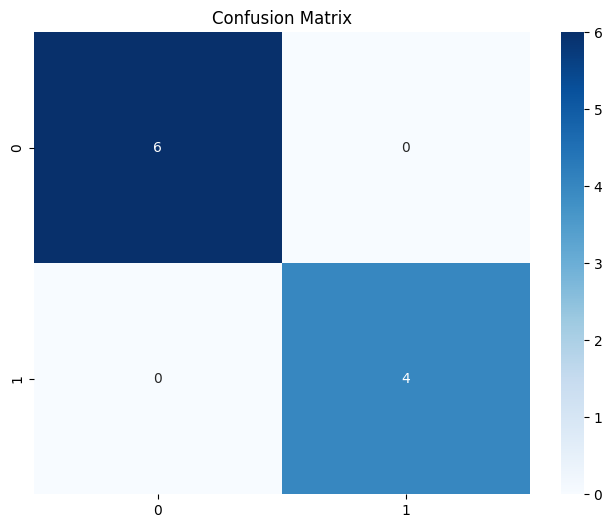

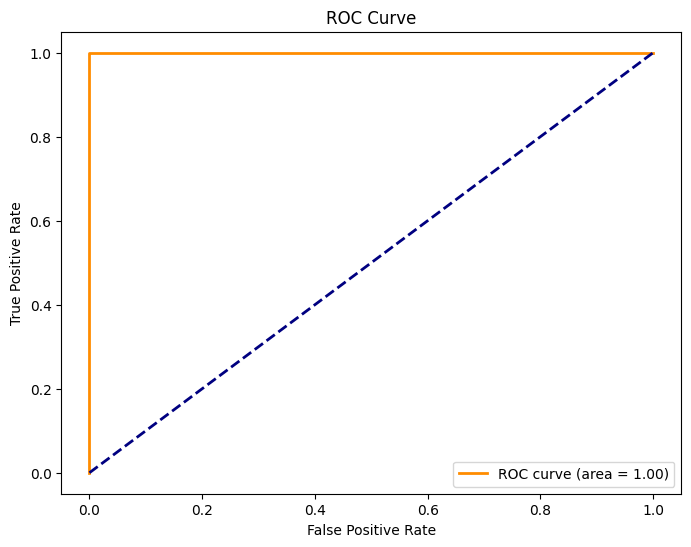

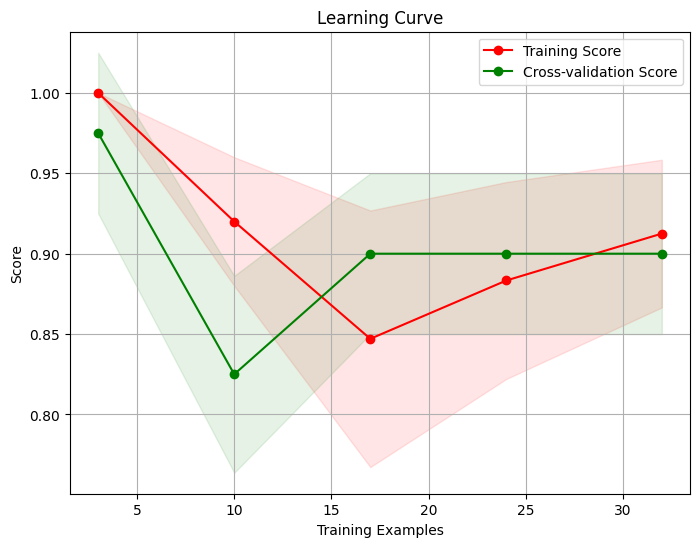

In [6]:
from sklearn.linear_model import LogisticRegression

# Step 6: Model training and evaluation
logistic_regression = LogisticRegression()

# Evaluate the logistic regression model using the provided function
evaluate_model(logistic_regression, X_train, X_test, y_train, y_test)